<a href="https://colab.research.google.com/github/nell78/text_data_analysis/blob/main/exercise/naver_movie_sentimental_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 데이터 불러오기
  
  - 데이터 출처 : https://github.com/e9t/nsmc/

In [1]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/e9t/nsmc/refs/heads/master/ratings_train.txt', sep = '\t')
df.head()

,id,document,label
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1


# EDA

  - label 분포
  

In [9]:
df.shape

(150000, 3)

In [10]:
# null
print(df.info())
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   id        150000 non-null  int64 
 1   document  150000 non-null  object
 2   label     150000 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 3.4+ MB
None


,0
id,0
document,0
label,0


In [12]:
df.dropna(inplace=True)
df.shape

(150000, 3)

In [13]:
# label 분포
df['label'].value_counts()

,count
label,
0,75173
1,74827


In [15]:
# 텍스트 길이
df['len'] = df['document'].str.len()
df.head()

,id,document,label,len
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0,19
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1,33
2,10265843,너무재밓었다그래서보는것을추천한다,0,17
3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0,29
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1,61


<Axes: xlabel='len', ylabel='Count'>

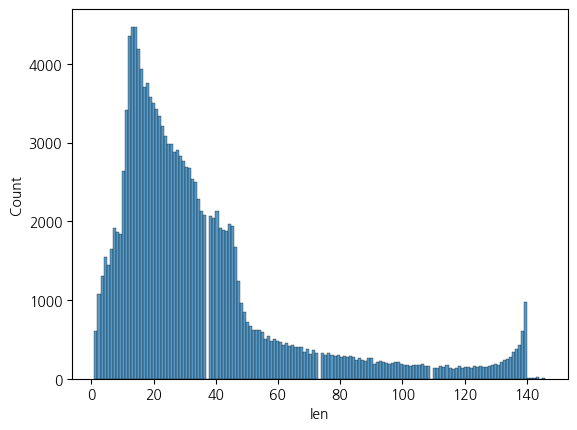

In [16]:
import seaborn as sns

sns.histplot(df['len'])

일반적으로 사용자는 20~30글자 사이의 댓글을 가장 많이 다는 것을 알 수 있었다. 추후 신경망을 사용하여 학습하기 위해, 글자수를 특정 값 기준으로 잘라주어야할 경우, 60 글자 정도 수준에서 분할을 하여 처리를 할 예정이다.

In [24]:
negative_text = df[df['label'] == 0]['document']

positive_text = df[df['label'] == 1]['document']

In [25]:
# DataFrame 구조의 문자를 문자열 형태로 변환

negative_text = " ".join(negative_text.astype(str))
positive_text = " ".join(positive_text.astype(str))

In [21]:
pip install konlpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 51.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 488.6/488.6 kB 23.9 MB/s eta 0:00:00


In [26]:
# 각 문자열에서 명사만 추출
from konlpy.tag import Okt
okt = Okt()
negative_nouns = okt.nouns(negative_text)
positive_nouns = okt.nouns(positive_text)

In [27]:
# 추출한 명사에서 각 명사가 몇 번 등장했는지 확인
from collections import Counter
negative_counts = Counter(negative_nouns)
positive_counts = Counter(positive_nouns)

In [28]:
# 자주 등장한(예, 50번 이상 등장한) 단어에 대해서만 워드 클라우드 생성
top_50_negative = negative_counts.most_common(50) # 특정 빈도수 이상 나타난 단어들을 반환
top_50_positive = positive_counts.most_common(50) # 특정 빈도수 이상 나타난 단어들을 반환

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.


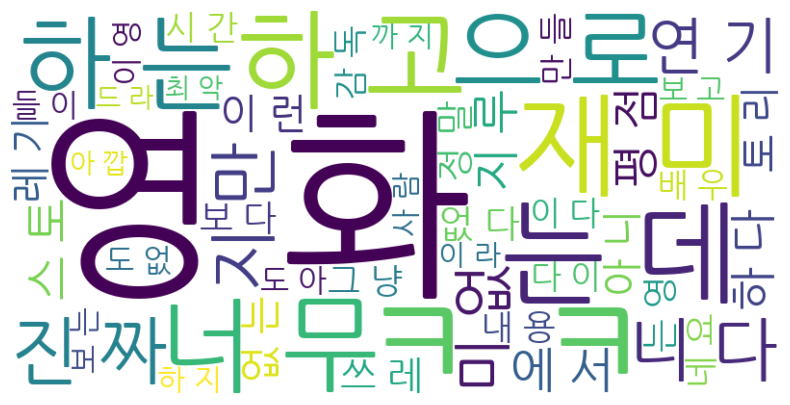

In [20]:
# 워드 클라우드

import matplotlib.pyplot as plt
from wordcloud import WordCloud

!apt-get install -y fonts-nanum
import matplotlib.font_manager as fm

font_path = "/usr/share/fonts/truetype/nanum/NanumGothic.ttf"
fm.fontManager.addfont(font_path)
plt.rc("font", family="NanumGothic")

df['document'] = df['document'].astype(str)
text = " ".join(df['document'])

wordcloud = WordCloud(font_path=font_path,
                      width=800,
                      height=400,
                      background_color="white",
                      max_words=50).generate(negative_text)

# 결과 시각화
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

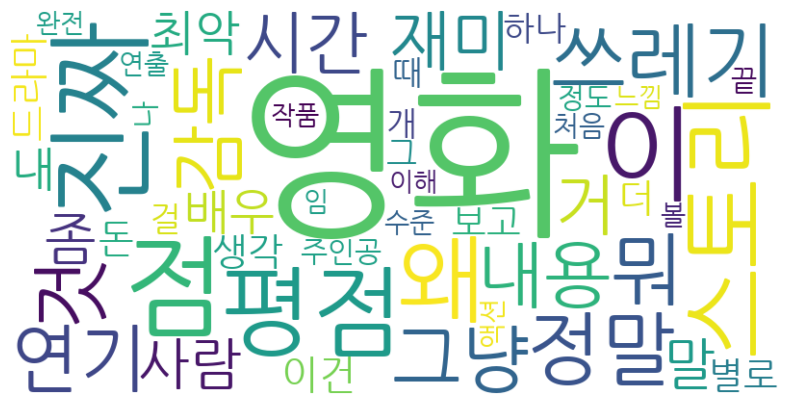

In [30]:
wordcloud = WordCloud(font_path=font_path,
                      width=800,
                      height=400,
                      background_color="white",
                      max_words=50).generate_from_frequencies(dict(top_50_negative))

# 결과 시각화
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()